<a href="https://colab.research.google.com/github/AayetMirza/CODSOFT/blob/main/Credit_card_fraud_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!mkdir -p "/content/drive/My Drive/Credit card fraud model

/bin/bash: -c: line 1: unexpected EOF while looking for matching `"'
/bin/bash: -c: line 2: syntax error: unexpected end of file


In [ ]:
! pip install kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d kartik2112/fraud-detection

100% 202M/202M [00:09<00:00, 26.8MB/s]
100% 202M/202M [00:09<00:00, 22.2MB/s]


In [ ]:
!unzip fraud-detection.zip

Archive:  fraud-detection.zip
  inflating: fraudTest.csv           
  inflating: fraudTrain.csv          


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
train_dataset= pd.read_csv('/content/fraudTrain.csv')
test_dataset= pd.read_csv('/content/fraudTest.csv')

In [ ]:
train_dataset.head()
test_dataset.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [ ]:
#train_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [ ]:
#train_dataset.isna().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [ ]:
#train_dataset.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [ ]:
#train_dataset.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06
mean,6.483370e+05,4.171920e+17,7.035104e+01,4.880067e+04,3.853762e+01,-9.022634e+01,8.882444e+04,1.349244e+09,3.853734e+01,-9.022646e+01,5.788652e-03
std,3.743180e+05,1.308806e+18,1.603160e+02,2.689322e+04,5.075808e+00,1.375908e+01,3.019564e+05,1.284128e+07,5.109788e+00,1.377109e+01,7.586269e-02
min,0.000000e+00,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902779e+01,-1.666712e+02,0.000000e+00
25%,3.241685e+05,1.800429e+14,9.650000e+00,2.623700e+04,3.462050e+01,-9.679800e+01,7.430000e+02,1.338751e+09,3.473357e+01,-9.689728e+01,0.000000e+00
50%,6.483370e+05,3.521417e+15,4.752000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.456000e+03,1.349250e+09,3.936568e+01,-8.743839e+01,0.000000e+00
75%,9.725055e+05,4.642255e+15,8.314000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1.359385e+09,4.195716e+01,-8.023680e+01,0.000000e+00
max,1.296674e+06,4.992346e+18,2.894890e+04,9.978300e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.371817e+09,6.751027e+01,-6.695090e+01,1.000000e+00


KeyboardInterrupt: ignored

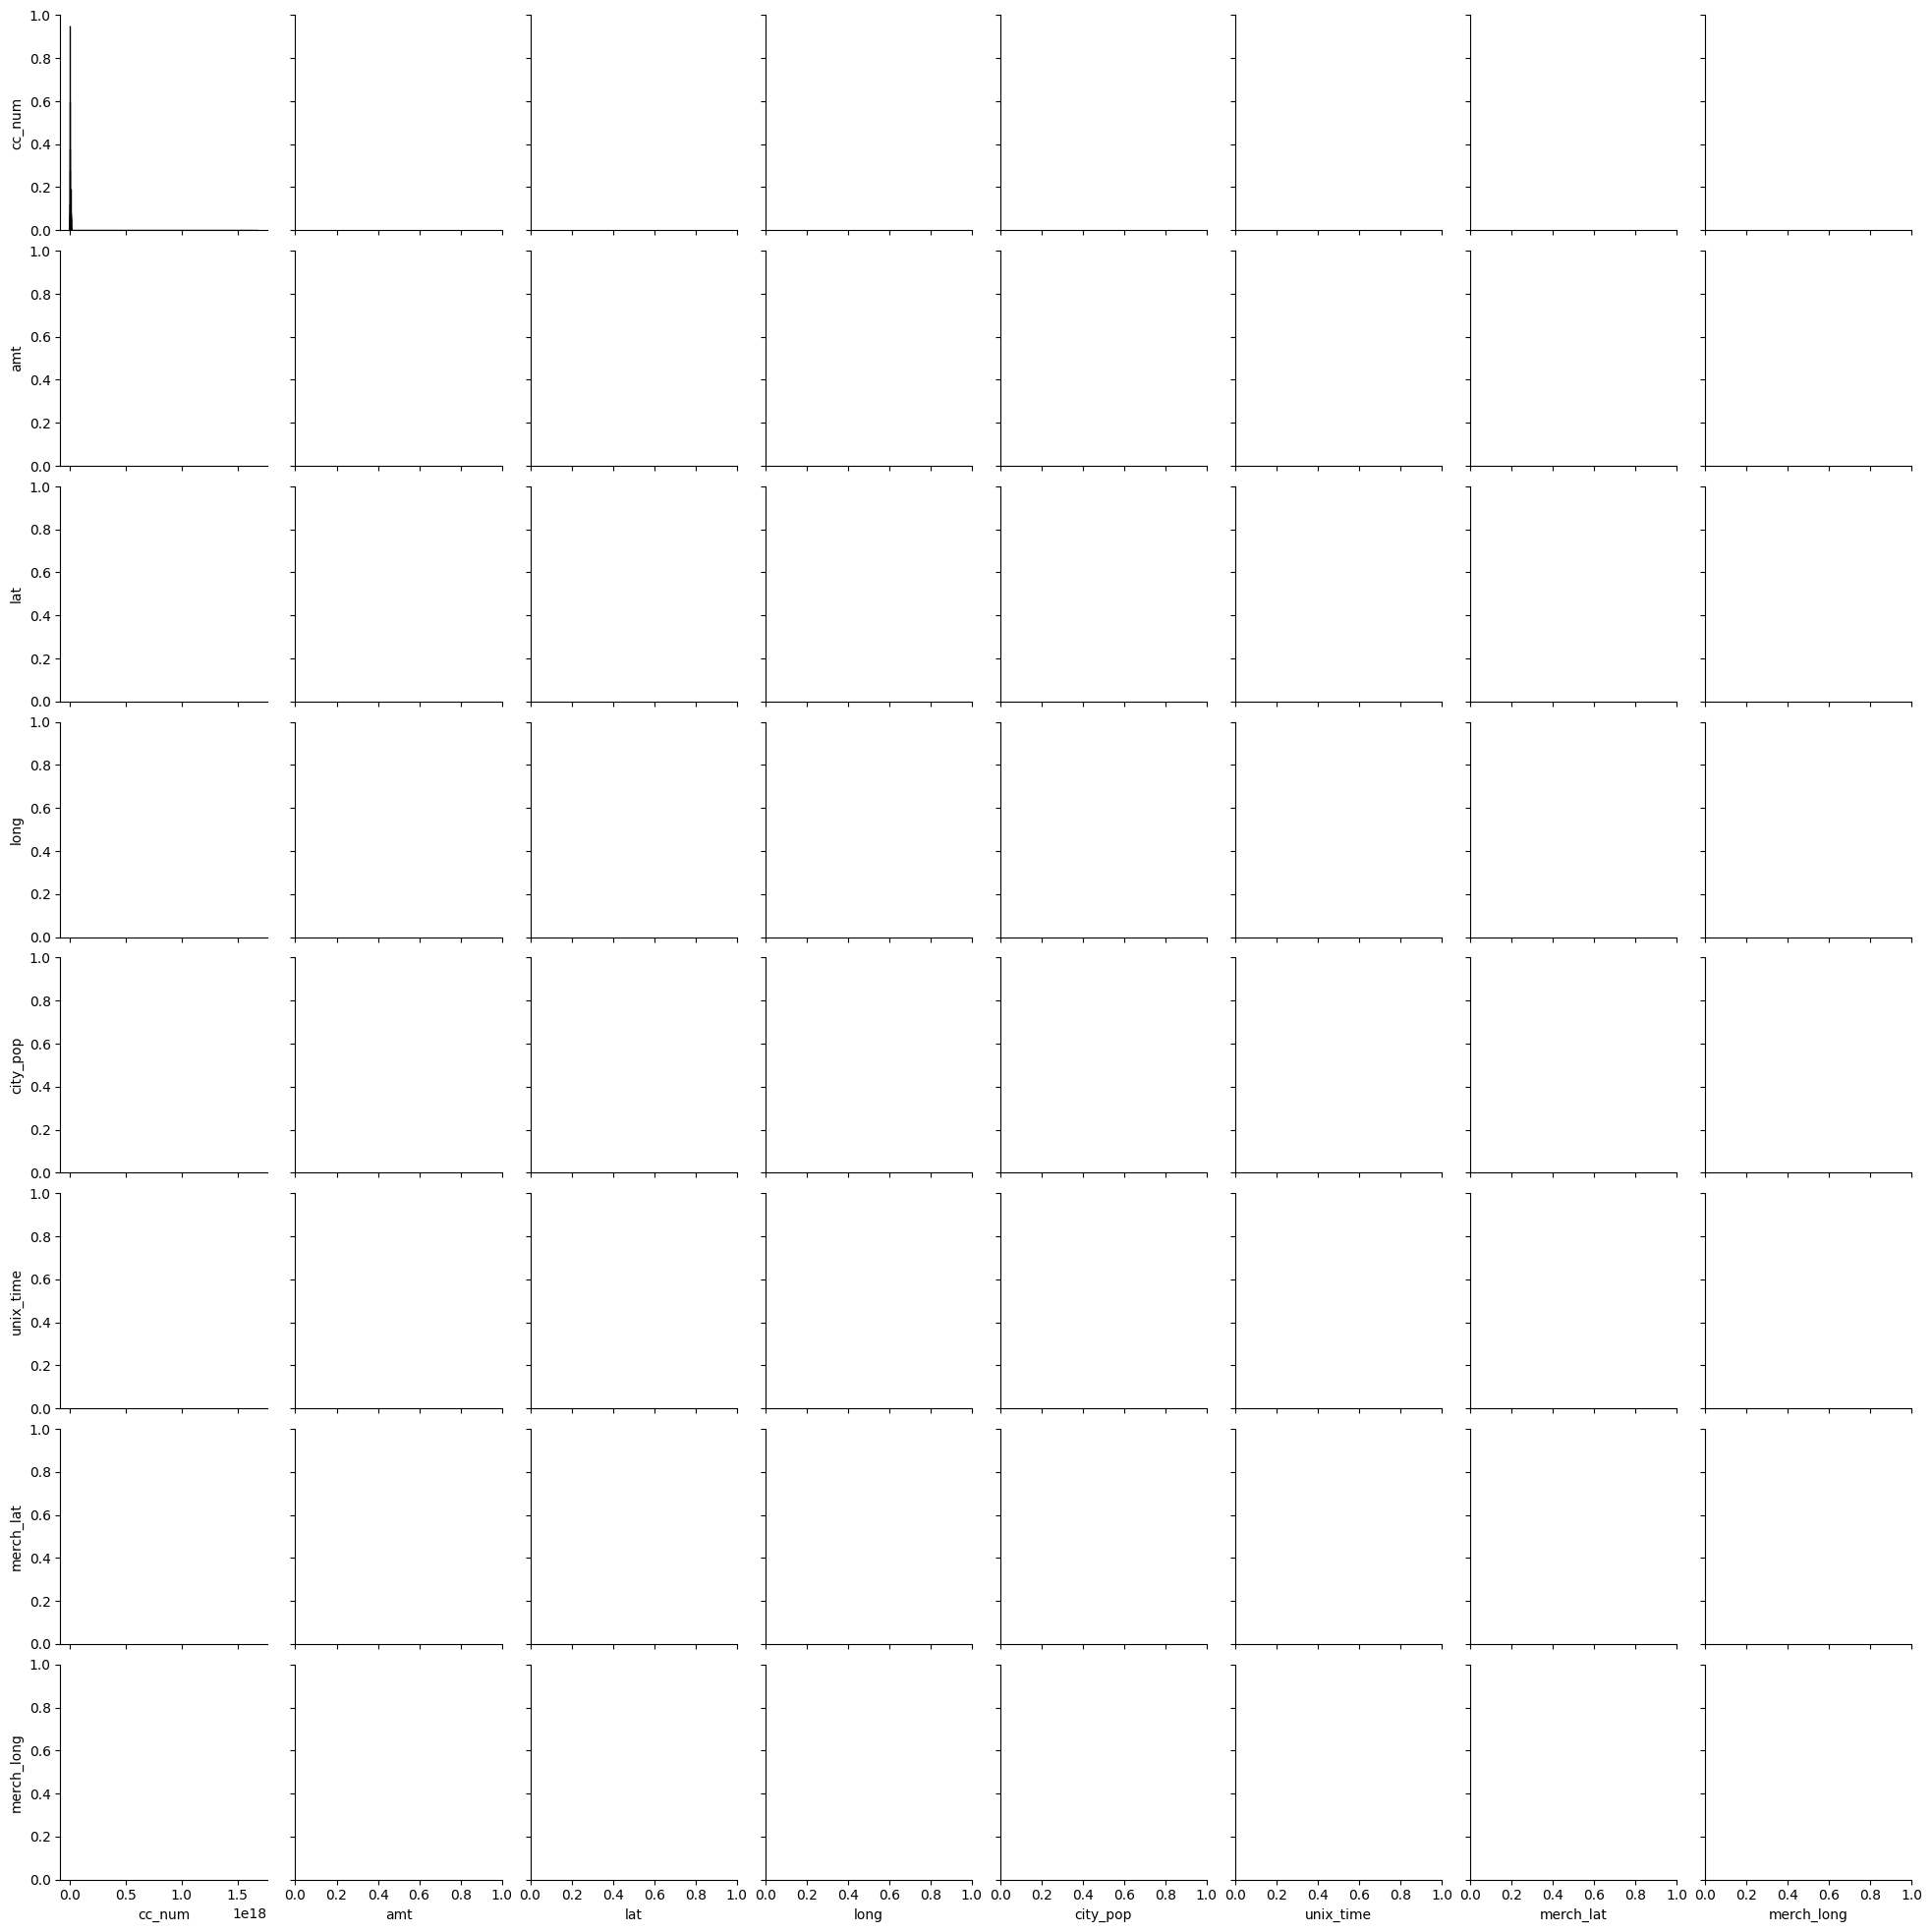

In [ ]:
#df=train_dataset[['cc_num', 'amt' , 'lat','long','city_pop', 'unix_time', 'merch_lat' , 'merch_long']]
#sns.pairplot(df, kind="scatter")
#plt.show()

In [ ]:
train_dataset[['trans_date', 'trans_time']] = train_dataset['trans_date_trans_time'].str.split(' ', expand=True)
test_dataset[['trans_date', 'trans_time']] = test_dataset['trans_date_trans_time'].str.split(' ', expand=True)

train_dataset['trans_date'] = pd.to_datetime(train_dataset['trans_date'])
train_dataset['trans_time'] = pd.to_timedelta(train_dataset['trans_time'])
train_dataset['trans_time'].info()
train_dataset['day_of_week'] = train_dataset['trans_date'].dt.dayofweek
train_dataset['hour_of_day'] = train_dataset['trans_time'].dt.components.hours
train_dataset.drop(columns=['trans_date_trans_time','trans_date' ,'trans_time'], inplace=True)

test_dataset['trans_date'] = pd.to_datetime(test_dataset['trans_date'])
test_dataset['trans_time'] = pd.to_timedelta(test_dataset['trans_time'])
test_dataset['trans_time'].info()
test_dataset['day_of_week'] = test_dataset['trans_date'].dt.dayofweek
test_dataset['hour_of_day'] = test_dataset['trans_time'].dt.components.hours
test_dataset.drop(columns=['trans_date_trans_time','trans_date' ,'trans_time'], inplace=True)


from datetime import datetime
train_dataset['dob'] = pd.to_datetime(train_dataset['dob'])
current_year = datetime.now().year
train_dataset['age'] = current_year - train_dataset['dob'].dt.year
train_dataset.drop(columns=['dob'], inplace=True)

test_dataset['dob'] = pd.to_datetime(test_dataset['dob'])
current_year = datetime.now().year
test_dataset['age'] = current_year - test_dataset['dob'].dt.year
test_dataset.drop(columns=['dob'], inplace=True)

<class 'pandas.core.series.Series'>
RangeIndex: 1296675 entries, 0 to 1296674
Series name: trans_time
Non-Null Count    Dtype          
--------------    -----          
1296675 non-null  timedelta64[ns]
dtypes: timedelta64[ns](1)
memory usage: 9.9 MB
<class 'pandas.core.series.Series'>
RangeIndex: 555719 entries, 0 to 555718
Series name: trans_time
Non-Null Count   Dtype          
--------------   -----          
555719 non-null  timedelta64[ns]
dtypes: timedelta64[ns](1)
memory usage: 4.2 MB


In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

categorical_columns =  ['first', 'last','trans_num','merchant', 'category', 'gender','street','city', 'state', 'job']

for column in categorical_columns:
    train_dataset[column + '_encoded'] = label_encoder.fit_transform(train_dataset[column])
    train_dataset = train_dataset.drop(column, axis=1)

    test_dataset[column + '_encoded'] = label_encoder.fit_transform(test_dataset[column])
    test_dataset = test_dataset.drop(column, axis=1)



In [ ]:
train_dataset.head()
print(train_dataset['is_fraud'])
train_dataset['is_fraud'].unique()

0          0
1          0
2          0
3          0
4          0
          ..
1296670    0
1296671    0
1296672    0
1296673    0
1296674    0
Name: is_fraud, Length: 1296675, dtype: int64


array([0, 1])

In [ ]:
print(train_dataset[train_dataset['is_fraud'] == 1]['is_fraud'].head(5))

2449    1
2472    1
2523    1
2546    1
2553    1
Name: is_fraud, dtype: int64


In [ ]:
test_dataset.head()
print(test_dataset[test_dataset['is_fraud'] == 1]['is_fraud'].head(5))

1685    1
1767    1
1781    1
1784    1
1857    1
Name: is_fraud, dtype: int64


In [ ]:
X=train_dataset.drop(columns=['is_fraud'])
y=train_dataset['is_fraud']

testdata_X=test_dataset.drop(columns=['is_fraud'])
testdata_y=test_dataset['is_fraud']

In [ ]:
train_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 24 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   Unnamed: 0         1296675 non-null  int64  
 1   cc_num             1296675 non-null  int64  
 2   amt                1296675 non-null  float64
 3   zip                1296675 non-null  int64  
 4   lat                1296675 non-null  float64
 5   long               1296675 non-null  float64
 6   city_pop           1296675 non-null  int64  
 7   unix_time          1296675 non-null  int64  
 8   merch_lat          1296675 non-null  float64
 9   merch_long         1296675 non-null  float64
 10  is_fraud           1296675 non-null  int64  
 11  day_of_week        1296675 non-null  int64  
 12  hour_of_day        1296675 non-null  int64  
 13  age                1296675 non-null  int64  
 14  first_encoded      1296675 non-null  int64  
 15  last_encoded       1296675 non-n

In [ ]:
test_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 24 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         555719 non-null  int64  
 1   cc_num             555719 non-null  int64  
 2   amt                555719 non-null  float64
 3   zip                555719 non-null  int64  
 4   lat                555719 non-null  float64
 5   long               555719 non-null  float64
 6   city_pop           555719 non-null  int64  
 7   unix_time          555719 non-null  int64  
 8   merch_lat          555719 non-null  float64
 9   merch_long         555719 non-null  float64
 10  is_fraud           555719 non-null  int64  
 11  day_of_week        555719 non-null  int64  
 12  hour_of_day        555719 non-null  int64  
 13  age                555719 non-null  int64  
 14  first_encoded      555719 non-null  int64  
 15  last_encoded       555719 non-null  int64  
 16  tr

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the decision tree model
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
training_accuracy = accuracy_score(y_test, y_pred)
print("Training Accuracy:", training_accuracy)


Training Accuracy: 0.9977519424682361


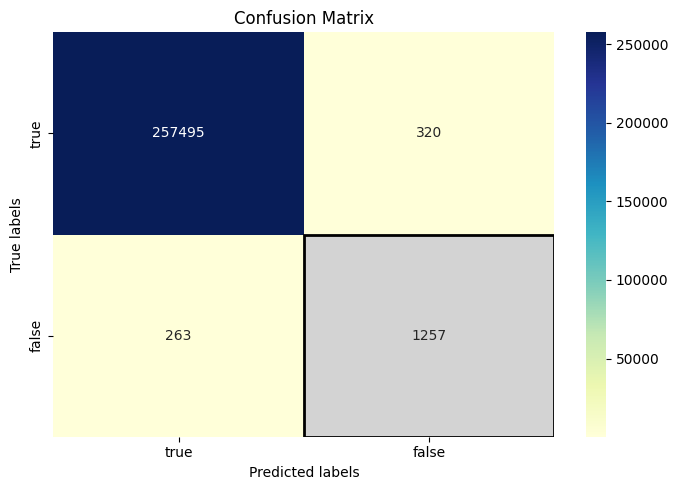

In [ ]:
from sklearn.metrics import confusion_matrix


from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)


plt.figure(figsize=(7, 5))
ax = sns.heatmap(cm, annot=True, fmt='g', cmap='YlGnBu')

ax.add_patch(plt.Rectangle((1, 1), 1, 1, fill=True, edgecolor='black', facecolor='lightgray', lw=2))

ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['true', 'false'])
ax.yaxis.set_ticklabels(['true', 'false'])

plt.tight_layout()
plt.show()


In [ ]:
test_predictions = model.predict(testdata_X)

# Evaluate the model
validation_accuracy = accuracy_score(testdata_y, test_predictions)
print("validation Accuracy:", validation_accuracy)

validation Accuracy: 0.9973547782242465


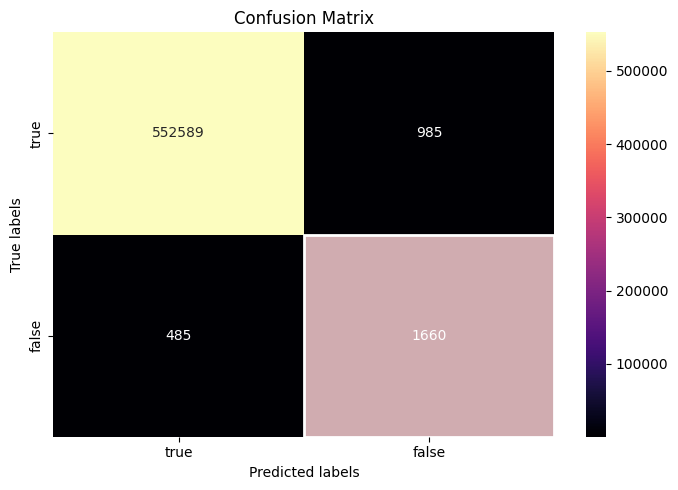

In [ ]:
valid_cm = confusion_matrix(testdata_y, test_predictions)

plt.figure(figsize=(7, 5))
ax = sns.heatmap(valid_cm, annot=True, fmt='g', cmap='magma')

# Add the colored block for "False False"
ax.add_patch(plt.Rectangle((1, 1), 1, 1, fill=True, edgecolor='white', facecolor='#D0ACB0', lw=2))


# Labels, title, and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['true', 'false'])
ax.yaxis.set_ticklabels(['true', 'false'])

plt.tight_layout()
plt.show()

